# Quality Over Year

In this notebook we explore how the average quality of the reviews change during a year for specific samples of beers/breweries. <br>
We want to see if, during particular beer-related events, the quality of the reviews significantly changes.

In particular we want to see the trend of beers made by Munich breweries around the globally renowned Oktoberfest.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

data_path = './../../../data'

In [44]:
def order_months(df):
    month_order = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }

    df['month_order'] = df.index.map(month_order)

    return df.sort_values('month_order').drop(columns='month_order')

## Oktoberfest

In [37]:
# Find the ids of the breweris of Munich
df_brew = pd.read_csv(os.path.join(data_path, 'RateBeer/breweries_RB_clean.csv'))

In [48]:
df_brew = df_brew[df_brew['location'] == 'Germany']

# List of Oktoberfest breweries
# There are still some breweries that are not in Oktoberfest (e.g. Stuttgarter Hofbräu &#40;Oetker Group&#41;)
# oktoberfest_breweries = [
#     'Augustiner-Bräu', 'Augustiner','Hacker-Pschorr', 'Hofbräu', 'Hofbräu München', 
#     'Löwenbräu', 'Paulaner', 'Spaten'
# ]
oktoberfest_breweries = [
    'Augustiner-Bräu', 'Hacker-Pschorr', 'Hofbräu München', 
    'Löwenbräu', 'Paulaner', 'Spaten'
]


# Check for matches (case-insensitive)
matches = df_brew[
    df_brew['name'].str.contains('|'.join(oktoberfest_breweries), case=False, na=False)
]

ids_okt = matches.id.to_list()

In [54]:
# Find the average score per month
df_score = pd.read_pickle(os.path.join(data_path, 'RateBeer/rev_w_scores.pkl'))

In [64]:
df_score_okt = df_score[df_score['brewery_id'].isin(ids_okt)].copy()

df_score_okt['date'] = pd.to_datetime(df_score_okt['date'])
df_score_okt['year-month'] = df_score_okt['date'].dt.to_period('M')
df_score_okt['month'] = df_score_okt['date'].dt.month_name()

exp_month = df_score_okt.groupby('month')['expertness_score'].agg(['mean'])

In [65]:
exp_month = order_months(exp_month)
exp_month.head(12)

,mean
month,
January,8.899196
February,9.144326
March,8.980989
April,9.128240
May,9.262283
June,9.022519
July,9.135476
August,8.933721
September,9.175595


In [ ]:
# Let's check if it is statistically significant
number_of_reviews_month = df_score_okt.groupby('month').size()

number_of_reviews_month = number_of_reviews_month.reset_index(name='review_count')

# Now there are two methods to re-order the months....
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
number_of_reviews_month['month'] = pd.Categorical(
    number_of_reviews_month['month'], categories=month_order, ordered=True
)

number_of_reviews_month = number_of_reviews_month.sort_values('month')

Text(0.5, 0.98, 'Analysis of reviews of breweries present at Oktoberfest')

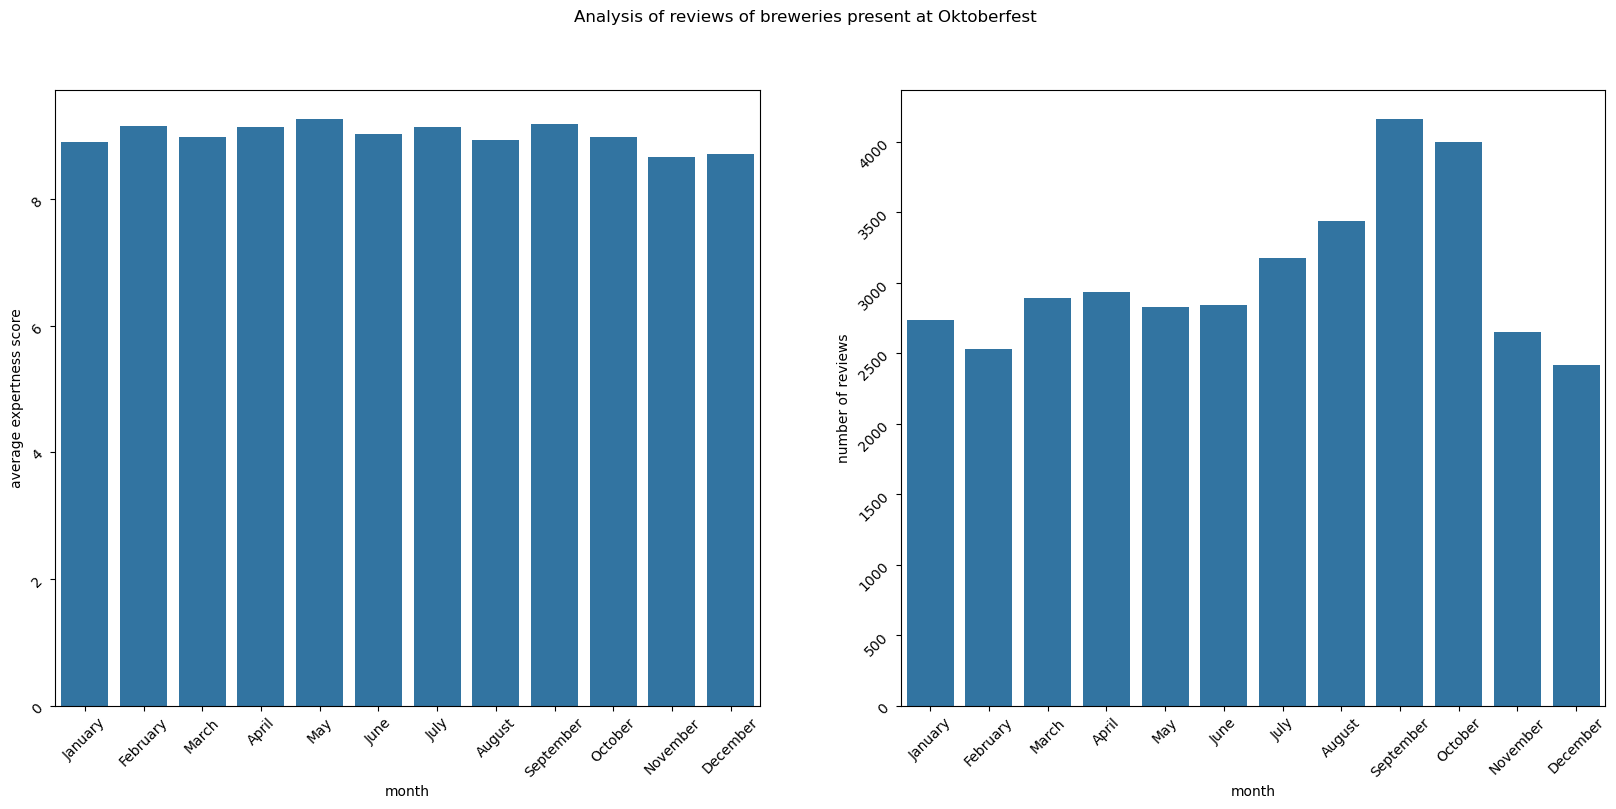

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8), nrows=1, ncols=2)

sns.barplot(x='month', y='mean', data=exp_month, ax=ax[0])
ax[0].tick_params(rotation=45)
ax[0].set_ylabel('average expertness score')
ax[0].set_title('Average expertness score per month')

sns.barplot(x='month', y='review_count', data=number_of_reviews_month, ax=ax[1])
ax[1].tick_params(rotation=45)
ax[1].set_ylabel('number of reviews')
ax[1].set_title('Number of reviews per month')

fig.suptitle('Analysis of reviews of breweries present at Oktoberfest')

## American beers

I now try to check if American beers have a particular date that, on average, lowers the score of the reviews.

In [57]:
df_score.columns

Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'review', 'lang_tag', 'stems', 'flavor',
       'aroma', 'mouthfeel', 'brewing', 'technical', 'appearance', 'judgment',
       'off_flavors', 'miscellaneous', 'expertness_score'],
      dtype='object')